# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

In [30]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [31]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

## 导入工具包

In [32]:
import pandas as pd
import numpy as np

## 载入类别名称和ID

In [33]:
dataset_name = 'test_easy_classes'
model_path = 'models/2023-09-24-15:52_max_epoch_50/'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入测试集预测结果表格

In [34]:
df = pd.read_csv(model_path + dataset_name + '-测试集预测结果.csv')

In [35]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,covering-预测置信度,device-预测置信度,domestic_animal-预测置信度,mater-预测置信度,person-预测置信度,plant-预测置信度,structure-预测置信度,vertebrate-预测置信度
0,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,3,mater,1,device,6,structure,False,0.053483,0.221736,0.001853,0.478643,0.015743,0.007416,0.206461,0.014667
1,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,2,domestic_animal,4,person,7,vertebrate,False,0.065810,0.001200,0.730829,0.007129,0.097066,0.001619,0.002674,0.093673
2,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,4,person,5,plant,6,structure,False,0.099537,0.015642,0.002969,0.060892,0.297557,0.256265,0.151516,0.115622
3,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,0,covering,4,person,3,mater,True,0.514543,0.002269,0.005743,0.012137,0.446524,0.005227,0.008116,0.005442
4,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,4,person,0,covering,7,vertebrate,True,0.300385,0.001374,0.025110,0.004683,0.617911,0.006019,0.003014,0.041503


## 绘制某一类别的ROC曲线

In [36]:
specific_class = 'covering'

In [37]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [38]:
y_test

0        True
1        True
2        True
3        True
4        True
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: 标注类别名称, Length: 4600, dtype: bool

In [39]:
# 二分类置信度
y_score = df[specific_class + '-预测置信度']

In [40]:
y_score

0       0.053483
1       0.065810
2       0.099537
3       0.514543
4       0.300385
          ...   
4595    0.110088
4596    0.025481
4597    0.000115
4598    0.005393
4599    0.003651
Name: covering-预测置信度, Length: 4600, dtype: float64

In [41]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

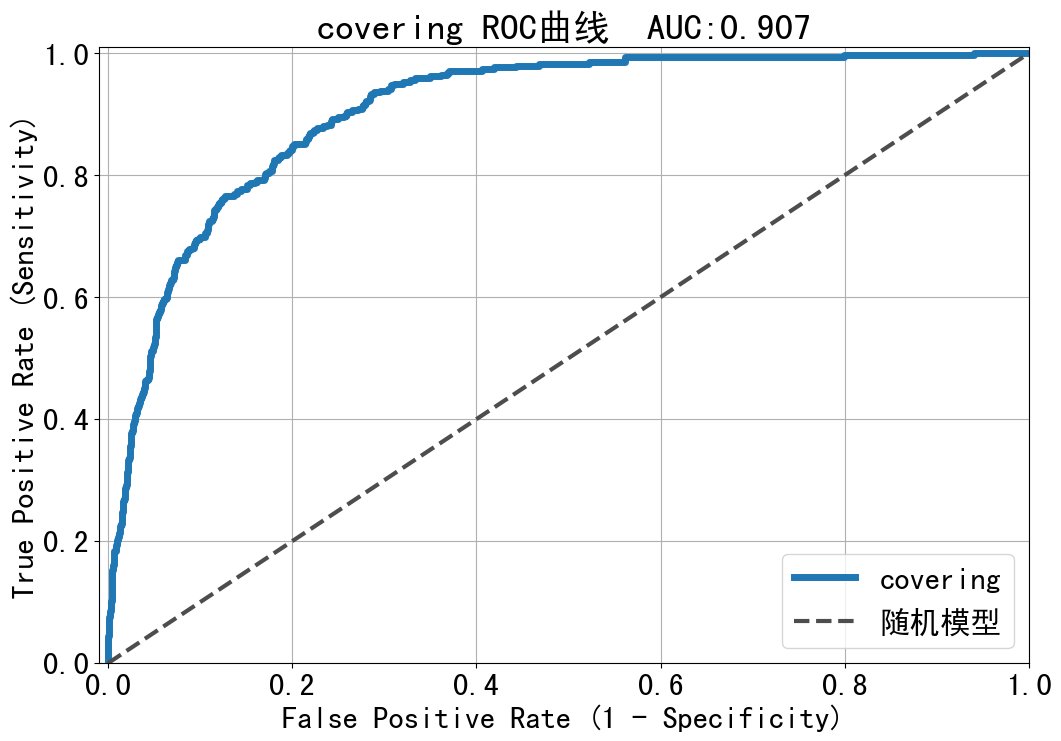

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

In [43]:
auc(fpr, tpr)

0.9067410776824636

## 绘制所有类别的ROC曲线

In [44]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [45]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [46]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

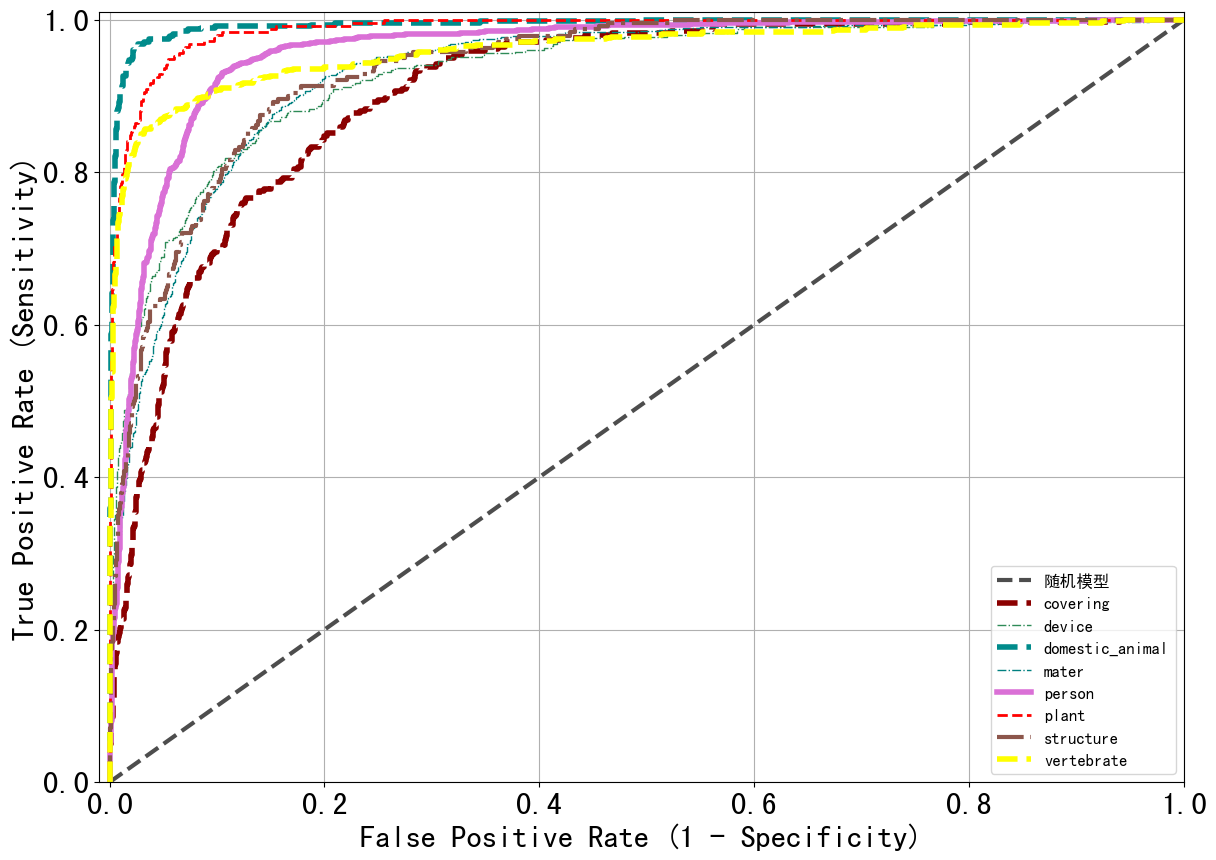

In [47]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig(model_path + dataset_name + '-各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [48]:
df_report = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [49]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP
0,covering,0.529412,0.342105,0.415631,342.0,0.342105,0.473534
1,device,0.678063,0.583333,0.627141,408.0,0.583333,0.677248
2,domestic_animal,0.880240,0.928421,0.903689,475.0,0.928421,0.949062
3,mater,0.692748,0.758621,0.724190,957.0,0.758621,0.789442
4,person,0.827562,0.865942,0.846317,1380.0,0.865942,0.896050
5,plant,0.766917,0.809524,0.787645,252.0,0.809524,0.876592
6,structure,0.512821,0.500000,0.506329,240.0,0.500000,0.535401
7,vertebrate,0.841121,0.824176,0.832562,546.0,0.824176,0.882693
8,macro avg,0.716110,0.701515,0.705438,4600.0,0.701515,0.760003
9,weighted avg,0.751394,0.758913,0.752788,4600.0,0.758913,0.807057


In [50]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [51]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [52]:
df_report['AUC'] = auc_list

In [53]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,covering,0.529412,0.342105,0.415631,342.0,0.342105,0.473534,0.906741
1,device,0.678063,0.583333,0.627141,408.0,0.583333,0.677248,0.931102
2,domestic_animal,0.880240,0.928421,0.903689,475.0,0.928421,0.949062,0.993123
3,mater,0.692748,0.758621,0.724190,957.0,0.758621,0.789442,0.931061
4,person,0.827562,0.865942,0.846317,1380.0,0.865942,0.896050,0.958644
5,plant,0.766917,0.809524,0.787645,252.0,0.809524,0.876592,0.988230
6,structure,0.512821,0.500000,0.506329,240.0,0.500000,0.535401,0.936459
7,vertebrate,0.841121,0.824176,0.832562,546.0,0.824176,0.882693,0.960312
8,macro avg,0.716110,0.701515,0.705438,4600.0,0.701515,0.760003,0.950709
9,weighted avg,0.751394,0.758913,0.752788,4600.0,0.758913,0.807057,0.950826


In [54]:
df_report.to_csv(model_path + dataset_name + '-各类别准确率评估指标.csv', index=False)